## PipeLine, PCA, SVM Practice
    - Labeled Faces in Wild 얼굴 이미지 사진에 대해, 다음 조건을 만족하는 분류 모형을 만들고 평가해본다.

1. 컴포넌트가 100개인 PCA와 선형 커널 서포트 벡터 머신을 파이프라인으로 연결하여 분류 모형을 만든다.
2. Validation_curve를 이용하여 가장 accuracy가 높은 slack variable penalty C값을 찾는다.(cv=3)

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
f = open("lfw_people.p", "rb")
lfw_people = pickle.load(f)
f.close()

X = lfw_people.data
y = lfw_people.target

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
X

array([[ 81.333336,  86.      , 102.      , ..., 134.      , 149.66667 ,
        120.      ],
       [ 33.333332,  58.      ,  80.      , ...,  79.333336, 103.      ,
        127.666664],
       [ 88.666664,  66.      ,  53.333332, ..., 132.33333 ,  59.666668,
         81.      ],
       ...,
       [ 49.333332,  55.666668,  76.666664, ..., 186.33333 , 176.33333 ,
        161.      ],
       [132.66667 , 152.66667 , 166.      , ..., 230.      , 226.      ,
        226.      ],
       [ 31.      ,  26.333334,  28.      , ...,  34.      ,  42.      ,
         69.666664]], dtype=float32)

In [4]:
y

array([11,  4,  2, ...,  3, 11,  5])

### 1. 컴포넌트가 100개인 PCA와 선형 커널 서포트 벡터 머신을 파이프라인으로 연결하여 분류 모형을 만든다.

In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [6]:
model = PCA(n_components=100).fit(X)
X = model.transform(X)

In [7]:
model = Pipeline([("pca", PCA(n_components=100)), ("svc", SVC(kernel="linear"))])

In [8]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [9]:
model.predict(X)

array([11,  4,  2, ...,  3, 11,  5])

In [10]:
y

array([11,  4,  2, ...,  3, 11,  5])

### 2. Validation_curve를 이용하여 가장 accuracy가 높은 slack variable penalty C값을 찾는다.(cv=3)

In [11]:
from sklearn.model_selection import validation_curve

In [12]:
train_scores, valid_scores = validation_curve(model, X, y, param_name="svc__C", param_range=np.logspace(-10, 10, 20), scoring="accuracy", cv=3)

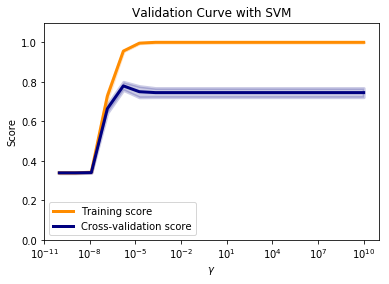

In [13]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 3

plt.semilogx(np.logspace(-10, 10, 20), train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(np.logspace(-10, 10, 20), train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(np.logspace(-10, 10, 20), valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(np.logspace(-10, 10, 20), valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
penalty_list = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, \
                1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
score_list = []
mean_score_list = []

In [16]:
for penalty in penalty_list:
    model = Pipeline([("pca", PCA(n_components=100)), ("svc", SVC(kernel="linear", C=penalty))])
    print(penalty)
    score = cross_val_score(model, X, y, cv=3)
    score_list.append(score)
    mean_score_list.append(np.mean(score))

1e-10
1e-09
1e-08
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0


In [17]:
score_list

[array([0.33714286, 0.34038462, 0.34174757]),
 array([0.33714286, 0.34038462, 0.34174757]),
 array([0.33714286, 0.34038462, 0.34174757]),
 array([0.56761905, 0.58846154, 0.58058252]),
 array([0.75428571, 0.78653846, 0.79417476]),
 array([0.72571429, 0.78076923, 0.76116505]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806]),
 array([0.71428571, 0.76923077, 0.75339806])]

In [18]:
max(mean_score_list)

0.7783329777019098

In [19]:
print(mean_score_list[4])
print(penalty_list[4])

0.7783329777019098
1e-06


### 최적 C 값은 1e-6